#1.Framing the problem statement
Here, we are trying to predict the heart failure of the patients.It is a classification modelling and target variable is DEATH_EVENT

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(data.shape)
print(data.columns)
print(data.head())

y = data['DEATH_EVENT']

# categorical column:
catCols = data.select_dtypes('object').columns
catCols = list(set(catCols))
print('categorical columns:',catCols,len(catCols))

# numerical columns:
numCols = data.select_dtypes('number').columns
numCols = list(set(numCols))
print('numeric columns:',numCols,len(numCols))

# we will remove death_event from categorical columns as it is target variable
numCols.remove('DEATH_EVENT')
print('numeric columns:',numCols,len(numCols))


(299, 13)
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
    age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]
categorical columns: [] 0
numeric columns: ['high_blood_pressure', 'time', 'age', 'creatinine_phosphokinase', 'smoking', 'DEATH_EVENT', 'serum_creatinine', 'diabetes', 'sex', 'platelets', 'anaemia', 'ejection_fraction', 'serum_sodium'] 13
numeric columns: ['high_blood

# 2. Hypothesis Testing
null hypothesis : there is no relationship between predictor and target

Alternate hypothesis : there is significant relationship between target and predictor

In [2]:
# we will carry out z-test for the numeric columns

from statsmodels.stats import weightstats as stests

significant_num = []
in_significant_num = []

for i in numCols:
  p_val = stests.ztest(data[i],data['DEATH_EVENT'])
  p_val = p_val[1]
  print('column:',i)
  print('p val:',p_val)

  if p_val < 0.05:
    status = 'Reject Null Hypothesis,Significant predictor'
    print('status:',status)
    significant_num.append(i)
  else:
    status = 'Accept Null Hypothesis,In significant predictor'
    print(status)
    in_significant_num.append(i)
print("significant:",significant_num,len(significant_num))
print("Insignificant:",in_significant_num,len(in_significant_num))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


column: high_blood_pressure
p val: 0.4364493597394351
Accept Null Hypothesis,In significant predictor
column: time
p val: 2.916240271353112e-184
status: Reject Null Hypothesis,Significant predictor
column: age
p val: 0.0
status: Reject Null Hypothesis,Significant predictor
column: creatinine_phosphokinase
p val: 3.6414696907146075e-25
status: Reject Null Hypothesis,Significant predictor
column: smoking
p val: 1.0
Accept Null Hypothesis,In significant predictor
column: serum_creatinine
p val: 5.150693802613001e-60
status: Reject Null Hypothesis,Significant predictor
column: diabetes
p val: 0.013692556870024446
status: Reject Null Hypothesis,Significant predictor
column: sex
p val: 2.3758486785457867e-17
status: Reject Null Hypothesis,Significant predictor
column: platelets
p val: 0.0
status: Reject Null Hypothesis,Significant predictor
column: anaemia
p val: 0.005123596096275054
status: Reject Null Hypothesis,Significant predictor
column: ejection_fraction
p val: 0.0
status: Reject Null

In [3]:
# we will see the OLS summary
import statsmodels.api as sm
a = data[['serum_sodium', 'diabetes', 'platelets', 'smoking', 'serum_creatinine', 'creatinine_phosphokinase', 'age', 'sex', 'time', 'ejection_fraction', 'anaemia', 'high_blood_pressure']]
# print(a)
model = sm.OLS(data['DEATH_EVENT'],a).fit()

model_prediction = model.predict(a)
model.details = model.summary()

print(model.details)

                                 OLS Regression Results                                
Dep. Variable:            DEATH_EVENT   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.579
Method:                 Least Squares   F-statistic:                              35.30
Date:                Tue, 01 Dec 2020   Prob (F-statistic):                    1.35e-49
Time:                        12:36:51   Log-Likelihood:                         -118.86
No. Observations:                 299   AIC:                                      261.7
Df Residuals:                     287   BIC:                                      306.1
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

# 3. Exploratory Data Analysis (EDA)

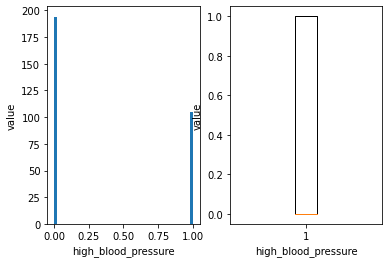

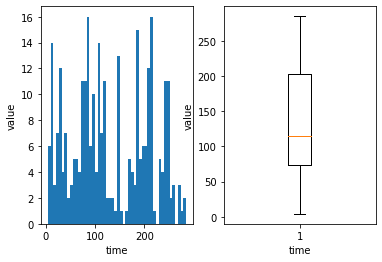

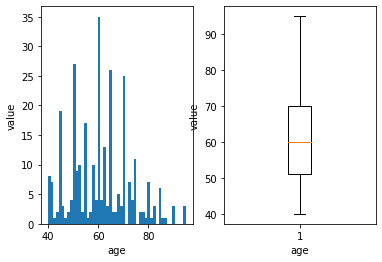

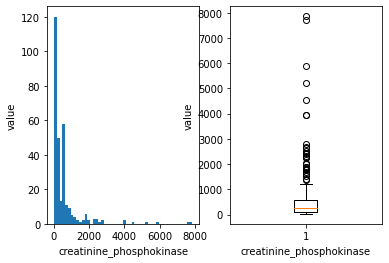

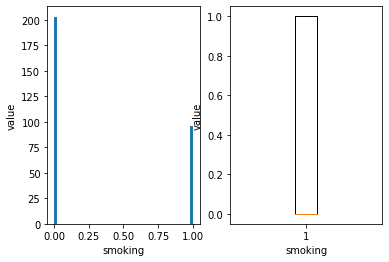

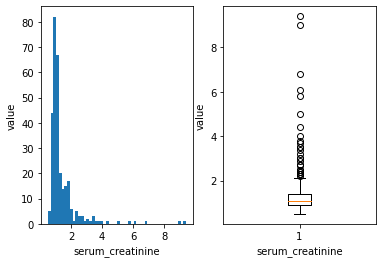

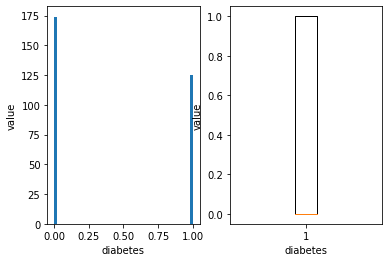

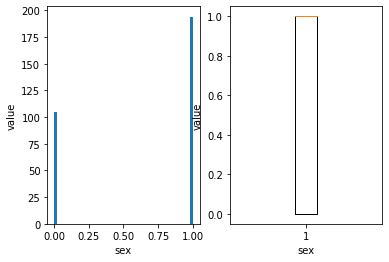

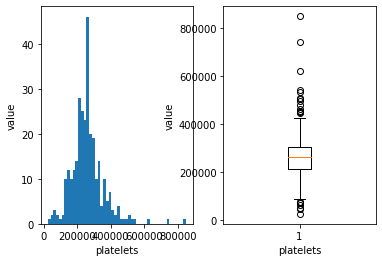

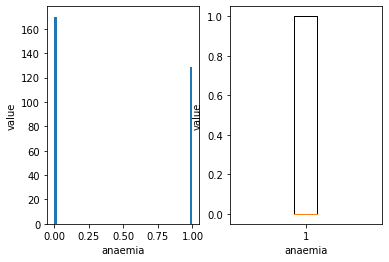

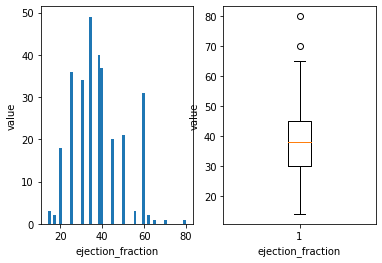

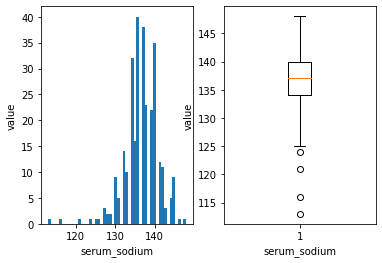

In [4]:
# 1.Univariate analysis of numerical column with histogram/distplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins = 50)
  plt.xlabel(i)
  plt.ylabel('value')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('value')

  plt.show()


                               age   anaemia  ...      time  DEATH_EVENT
age                       1.000000  0.088006  ... -0.224068     0.253729
anaemia                   0.088006  1.000000  ... -0.141414     0.066270
creatinine_phosphokinase -0.081584 -0.190741  ... -0.009346     0.062728
diabetes                 -0.101012 -0.012729  ...  0.033726    -0.001943
ejection_fraction         0.060098  0.031557  ...  0.041729    -0.268603
high_blood_pressure       0.093289  0.038182  ... -0.196439     0.079351
platelets                -0.052354 -0.043786  ...  0.010514    -0.049139
serum_creatinine          0.159187  0.052174  ... -0.149315     0.294278
serum_sodium             -0.045966  0.041882  ...  0.087640    -0.195204
sex                       0.065430 -0.094769  ... -0.015608    -0.004316
smoking                   0.018668 -0.107290  ... -0.022839    -0.012623
time                     -0.224068 -0.141414  ...  1.000000    -0.526964
DEATH_EVENT               0.253729  0.066270  ... -

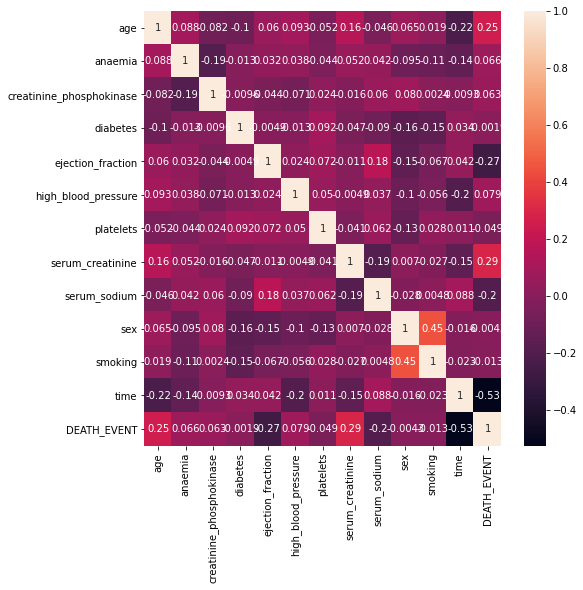

In [5]:
# noted :outliers are present in the features

# 1.Bivariate analysis of numerical column with correlation matrix
import  seaborn as sns
matrix = data.corr()

print(matrix)

fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(matrix,annot= True)


# 4.Missing Values

In [6]:
data.isnull().sum()
# as no missing values,we can proceed ahead

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# 5. Towards building the model

In [8]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,random_state = 0,test_size = 0.20)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(239, 13) (239,)
(60, 13) (60,)


In [9]:
# we will import robust scaler ,as it is powerful against outliers
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [12]:
from sklearn import model_selection
from numpy import abs

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
names = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))


for name,model in models:
  cv_score = model_selection.cross_val_score(model,x_train,y_train,cv = 20,scoring='accuracy')
  cv_score = np.sqrt(np.abs(cv_score))

  
  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print("----------------------------------")
  # print(model.score(x_train,y_train))

name:--->> Logistic Regression
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

name:--->> Linear svc
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> Random forest classifier
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> knn 
----------------------------------
CV mean Score :0.9383179174573563,CV min:0.8528028654224418,CV std :0.04191008799155382
----------------------------------
name:--->> Guassian NB 
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> Decision TreeClassifier
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------


In [13]:
# Selecting a model
# ------------------------------------------------------------------------

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0